<a href="https://colab.research.google.com/github/pritishma-shakya/Concepts-and-Technologies-of-AI/blob/main/2408412_PritishmaShakya_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Necessary Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import f_classif
from sklearn.metrics import roc_curve, auc

# 1. Exploratory Data Analysis and Data Understanding [5]:
1. Choosing a Dataset:

  • Select a dataset of your choice that interests you and aligns with one of the United Nations Sustainable Development Goals (UNSDG).

  Ans: The name of the dataset is "employee_attriton.csv". It aligns with the SDG 8: Decent Work and Economic Growth


  • Load the dataset into a DataFrame object using the Pandas library.


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Portfolio/employee_attrition_dataset.csv")

  • Perform an initial analysis to gather a detailed description of the dataset. For example:

  (a) When and by whom was the dataset created?

  Ans: It was created by the user Ziya07.
  
  (b) How did you access the dataset?

  Ans: The dataset was accessed from Kaggle.

  (c) How does it align with the chosen UNSDG?

  Ans: It aligns with theSDG 8: Decent Work and Economic Growth, as it focuses on predictingand understanding the employee attrition.
  
  (d) List all the attributes (columns) present in the dataset.

In [4]:
print("The attributes present in the dataset: ")
print(df.columns.tolist())

The attributes present in the dataset: 
['Employee_ID', 'Age', 'Gender', 'Marital_Status', 'Department', 'Job_Role', 'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company', 'Years_in_Current_Role', 'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating', 'Training_Hours_Last_Year', 'Overtime', 'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism', 'Work_Environment_Satisfaction', 'Relationship_with_Manager', 'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked', 'Attrition']


• Identify potential questions that the dataset could help answer.
1.   What factors contribute most to emploee attrition?
2.   Are certain departments or job roles more likely to experience higher attrition?
3. Does job satisfaction correlate with attrition rates?





In [5]:
print("Missing or null values: ")
print(df.isnull().sum())

Missing or null values: 
Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64


• Assess the dataset’s suitability for analysis (e.g., data completeness, relevance, and quality).
1.   Completeness: The dataset has no missing values
2.   Relevance: The dataset is highly relevant as it contains factors like job satisfaction, performance, salary, job involvement, etc. which highly aligns with the target variable "Attrition".
3. Quality: The dataset contains no missing and duplicated values.



2. Conducting Exploratory Data Analysis (EDA):

  • Understanding the characteristics of the data beforehand is crucial for building a model withacceptable performance. Before proceeding to build, train, and test the model, write code to inspect, preview, summarize, explore, and visualize your data. For example:



*   Data Inspection



In [6]:
print("Number of rows: ",df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  1000
Number of columns:  26


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

  (a) Perform data cleaning and compute summary statistics for the dataset.
  


In [8]:
print("Droping the unnecessary column Employee_ID")
df = df.drop(['Employee_ID'], axis=1)

Droping the unnecessary column Employee_ID


In [9]:
print("Duplicated values: ")
print(df.duplicated().sum())

Duplicated values: 
0


*   Preview of the Data



In [10]:
# Displaying the first few rows of the dataset
df.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,58,Female,Married,IT,Manager,1,15488,28,15,4,...,No,6,54,17,4,4,4,20,3,No
1,48,Female,Married,Sales,Assistant,5,13079,28,6,9,...,Yes,2,45,1,4,1,2,25,2,No
2,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,...,Yes,6,34,2,3,4,4,45,3,No
3,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,...,No,9,48,18,2,3,1,35,3,No
4,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,...,No,3,33,0,4,1,3,44,3,No


In [11]:
# Displaying the last few rows of the datset
df.tail()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
995,27,Female,Divorced,HR,Analyst,2,4172,76,24,14,...,No,4,46,10,3,1,4,24,4,No
996,47,Male,Single,IT,Manager,4,11007,71,19,6,...,Yes,7,36,16,3,2,4,39,3,Yes
997,50,Female,Divorced,IT,Executive,1,4641,43,25,12,...,Yes,1,46,9,2,3,3,33,2,No
998,28,Female,Married,HR,Executive,4,19855,92,13,13,...,No,4,52,17,4,1,4,41,4,No
999,48,Female,Divorced,IT,Analyst,2,11738,39,1,1,...,Yes,2,59,5,1,4,3,43,2,No


*   Summary Statistics for the Datset



In [12]:
# Summary of the numerical data
df.describe()

,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


  (b) Explore the data through visualizations and charts. Ensure you explain and summarize the
  insights gained from each chart.

0 - Not Leaving

1 - Leaving

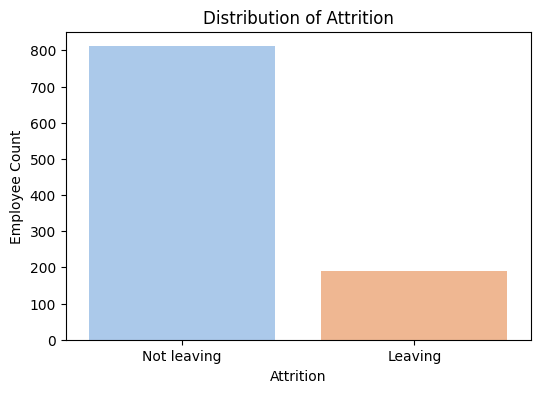

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df,hue='Attrition', palette='pastel')
plt.title("Distribution of Attrition")
plt.xlabel("Attrition")
plt.ylabel("Employee Count")
plt.xticks(["No", "Yes"], ['Not leaving', 'Leaving'])
plt.show()

Ans: This bar graph displays the distribution of attrition scores among the employees.  It shows that around 800 employees are staying and 200 employees are leaving



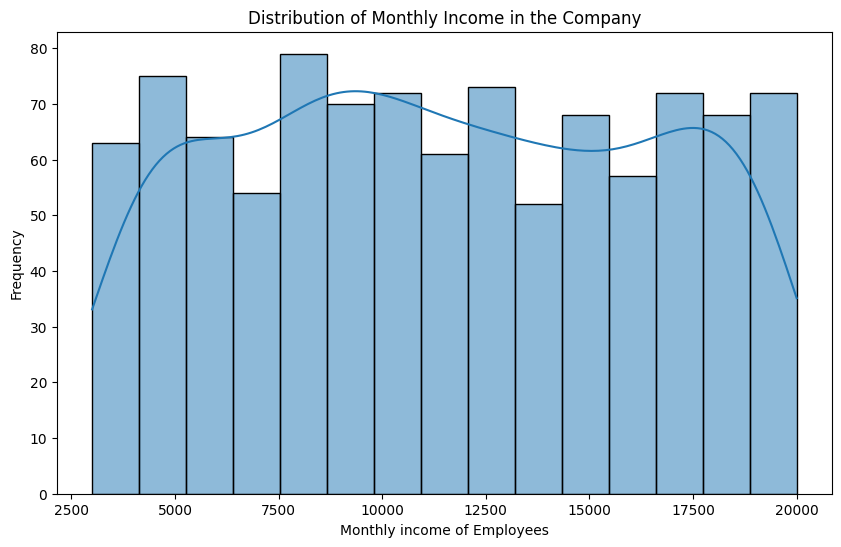

In [14]:
# Histogram for numerical features
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Monthly_Income', bins=15, kde=True, edgecolor='black')
plt.title('Distribution of Monthly Income in the Company')
plt.xlabel('Monthly income of Employees')
plt.ylabel('Frequency')
plt.show()

Ans: The above given histogram illistrates the distribution of monthly income in a company. The most common income ranges are around 5000 and 10000 and the least common income ranges are around 2500 and 20000. This helps in understanding the income structure and identifying patterns in the distribution.

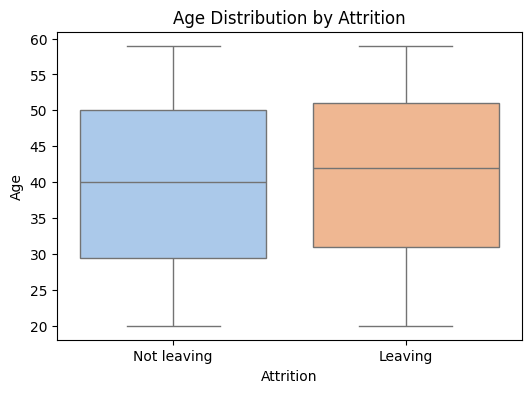

In [15]:
# Box plot showing the age distribution by attrition
plt.figure(figsize=(6,4))
sns.boxplot(x="Attrition", y="Age", data=df, hue='Attrition', palette="pastel")
plt.title("Age Distribution by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Age")
plt.xticks([0, 1], ['Not leaving', 'Leaving'])
plt.show()

Ans: The box plot compares the age distribution of the employees who are leaving or not leaving the company. The median age for the "Not leaving" group is around 40 years, while the median age for the "Leaving" group is slightly higher, around 42 years. The interquartile range (IQR) for both groups is similar, with the "Not leaving" group having a slightly wider IQR.

In [16]:
df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Overtime'] = LabelEncoder().fit_transform(df['Overtime'])
df = pd.get_dummies(df, columns=['Marital_Status', 'Department', 'Job_Role'], drop_first=True)
df = df.astype({col: int for col in df.select_dtypes(include=['bool']).columns})

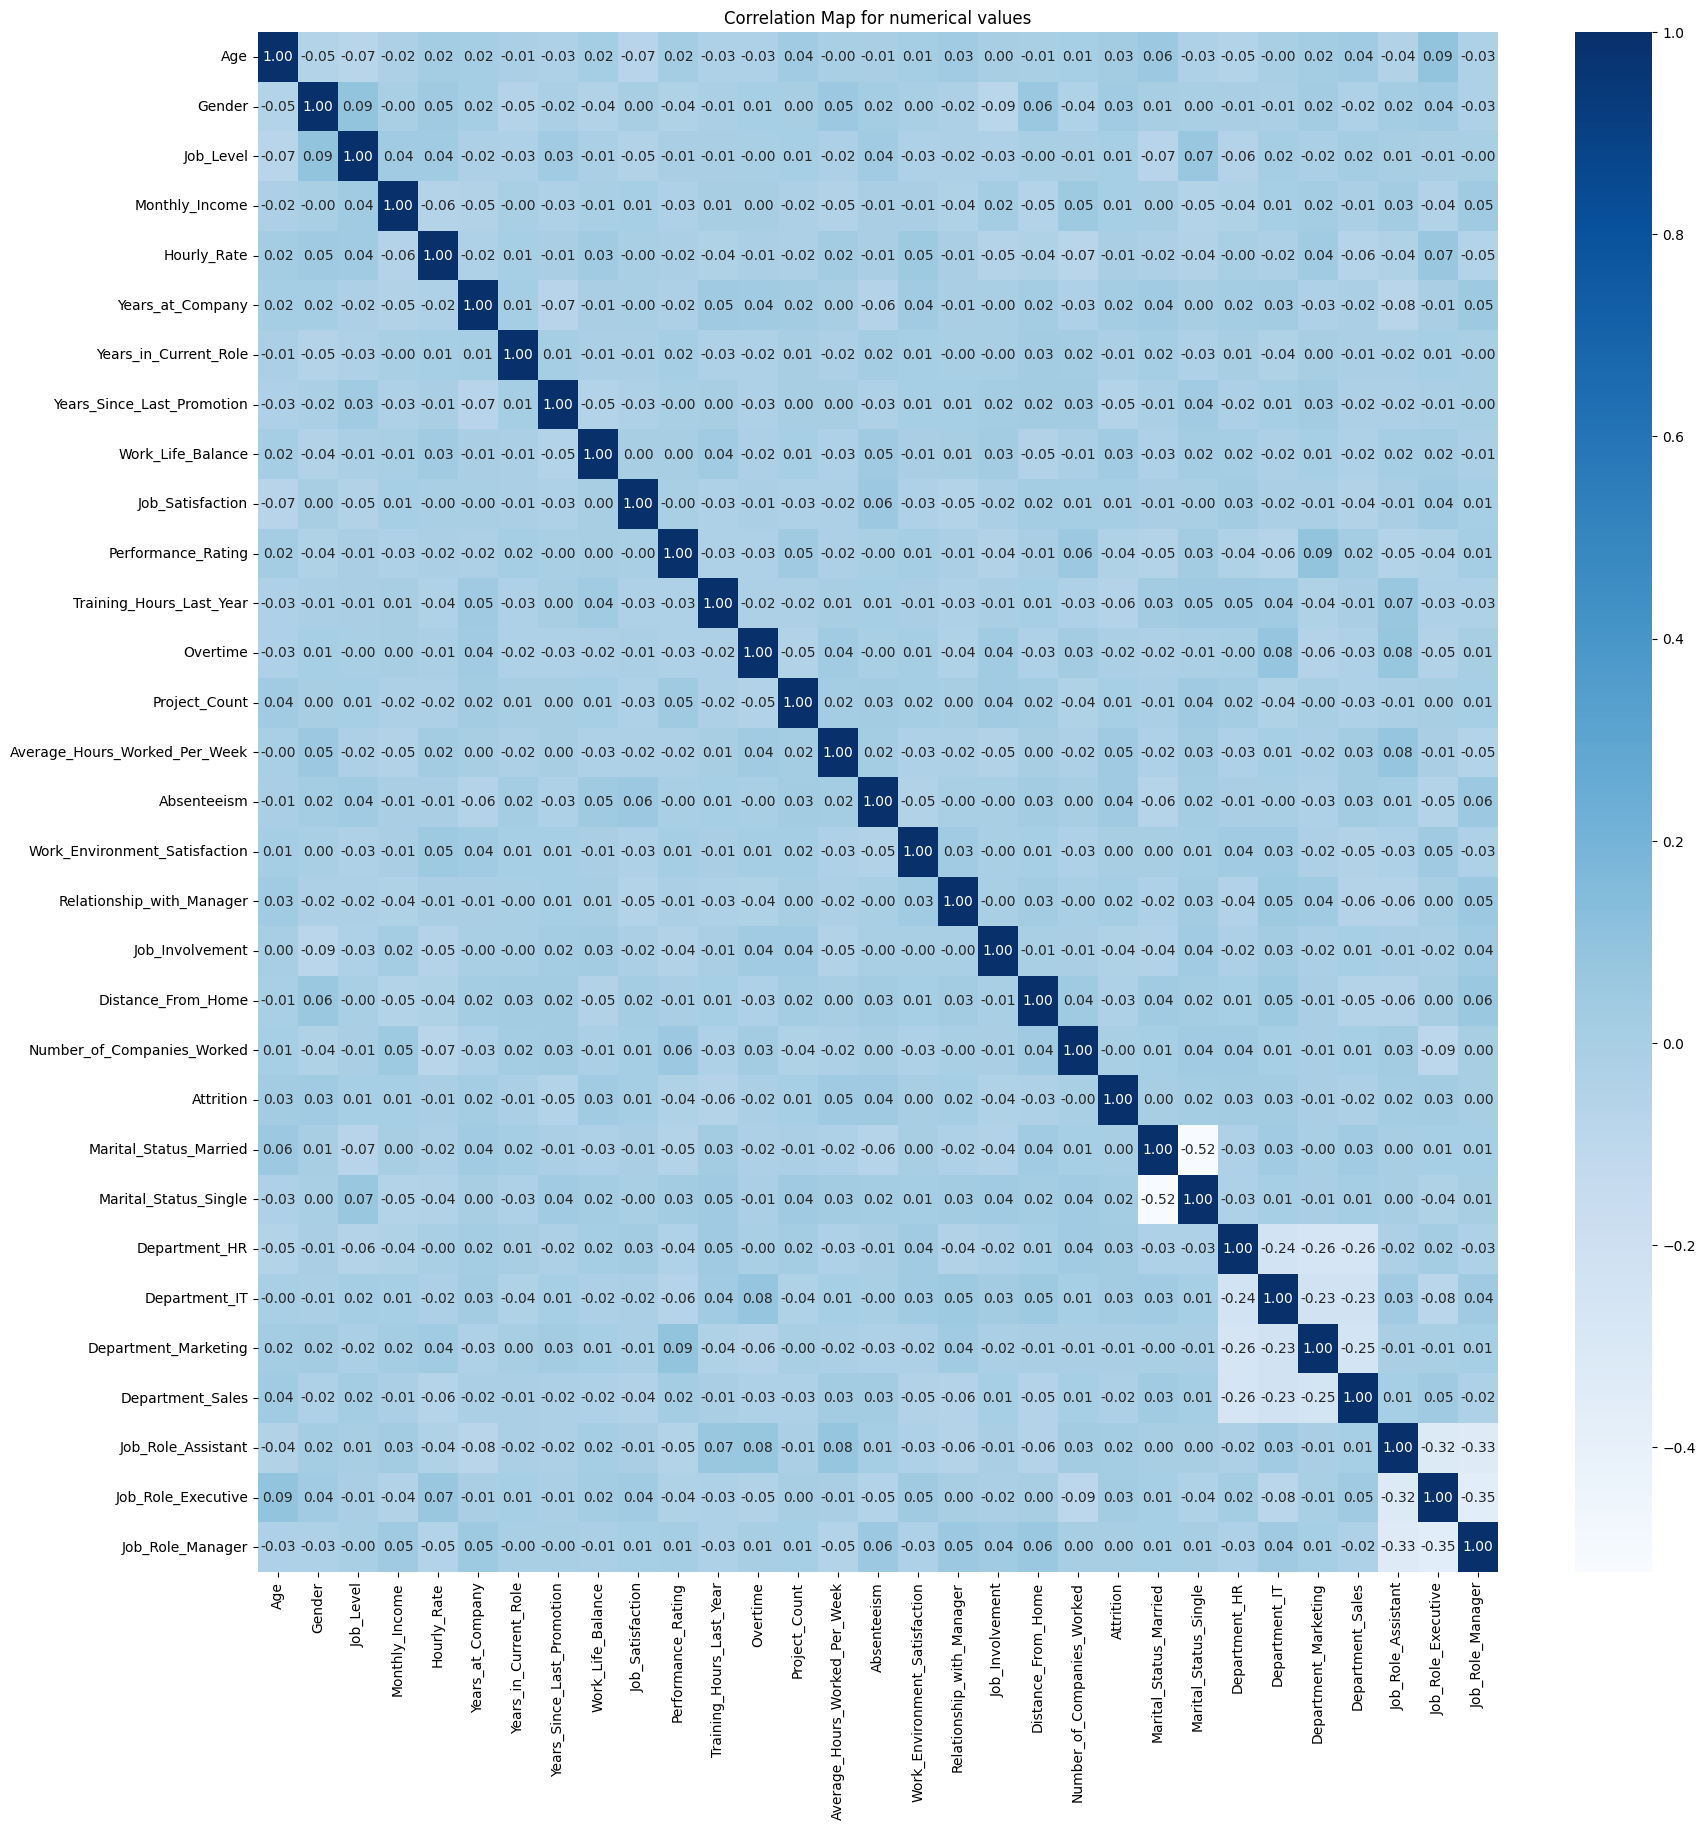

In [17]:
correlation=df.corr()
#Heatmap of the numerical values
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Map for numerical values')
plt.show()

Ans: The above heatmap shows the correlation between different features in the datset. The value ranges from -1 to 1.


#2. Build a Model from Scratch [5]:
  For Classification Task, build a Appropriate Logistic Regression {Sigmoid or Softmax} from scratch, and report
  the appropriate evaluation metrics on train and test set.


In [18]:
# Set random seed for reproducibility
np.random.seed(42)

# Split the dataset into features(X) and target(y)
X = df.drop(columns=['Attrition'], axis=1)
y = df['Attrition']

# Apply SMOTE to balance the classes by generating synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 80:20 Train-test split using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 74.15 %
Precision: 0.71
Recall: 0.82
F1 Score: 0.76
Logistic Regression Classification Report for test:
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       163
           1       0.71      0.82      0.76       162

    accuracy                           0.74       325
   macro avg       0.75      0.74      0.74       325
weighted avg       0.75      0.74      0.74       325

Confusion Matrix: 
[[108  55]
 [ 29 133]]


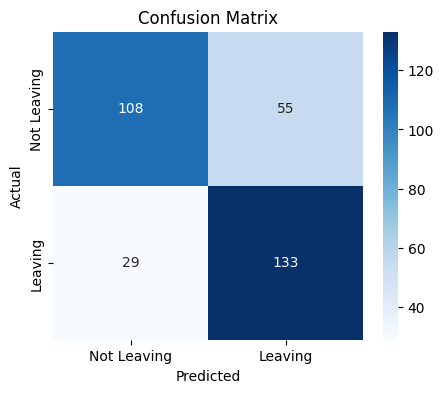

In [19]:
# Sigmoid function to compute the sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function with L2 regularization
def compute_cost(X, y, w, b, lamda):
    m = len(y)
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    cost = -(1/m) * np.sum(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
    reg_term = (lamda / (2 * m)) * np.sum(np.square(w))
    return cost + reg_term

# Gradient Descent with L2 regularization
def gradient_descent(X, y, w, b, alpha, iterations, lamda):
    m = len(y)
    cost_history = []  # To store cost at each iteration
    for i in range(iterations):
        h = sigmoid(np.dot(X, w) + b)
        dw = (1/m) * np.dot(X.T, (h - y)) + (lamda/m) * w
        db = (1/m) * np.sum(h - y)
        w -= alpha * dw
        b -= alpha * db

        # Store the cost history at each iteration
        cost_history.append(compute_cost(X, y, w, b, lamda))

    return w, b, cost_history

# Predict function with threshold adjustment
def predict(X, w, b, threshold=0.3):
    return (sigmoid(np.dot(X, w) + b) >= threshold).astype(int)

# Initialize parameters
w_init = np.random.randn(X_train_scaled.shape[1])  # Initialize the weight
b_init = 0  # Initialize the bias
alpha = 0.01  # Learning rate
iterations = 20000  # Number of iterations
lamda = 0.01  # Regularization strength
threshold = 0.4  # Threshold

# Train the model using gradient descent and get the cost history
w_out, b_out, cost_history = gradient_descent(X_train_scaled, y_train, w_init, b_init, alpha, iterations, lamda)

# Make predictions with the trained model
y_pred_test = predict(X_test_scaled, w_out, b_out, threshold=threshold)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)

# Print the accuracy and other metrics
print(f"Accuracy: {accuracy*100:.2f} %")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Evaluate the custom model using classification report
print("Logistic Regression Classification Report for test:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix: ")
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Leaving", "Leaving"], yticklabels=["Not Leaving", "Leaving"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

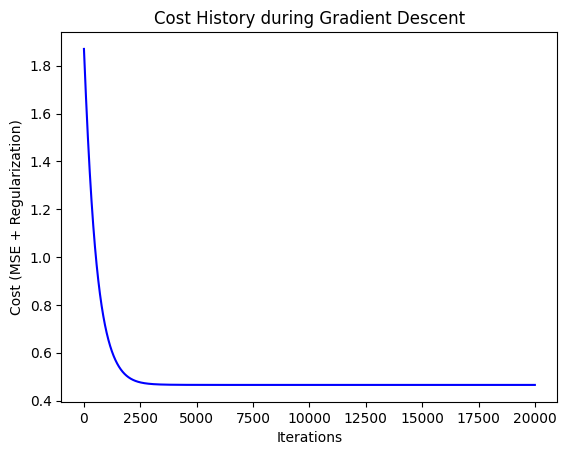

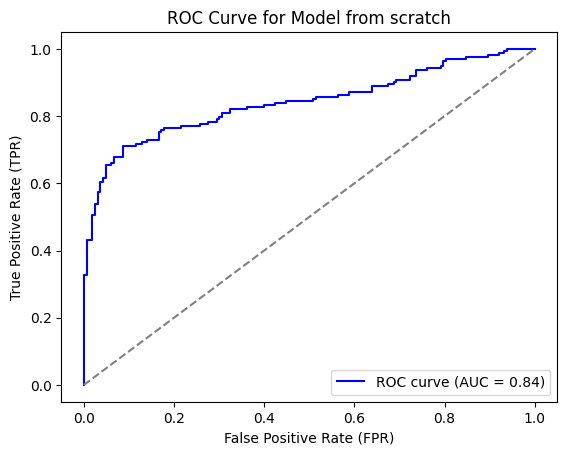

In [20]:
# Plotting cost history to visualize convergence
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE + Regularization)')
plt.title('Cost History during Gradient Descent')
plt.show()

# Get the predicted probabilities for the positive class (Leaving)
y_pred_prob = sigmoid(np.dot(X_test_scaled, w_out) + b_out)
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Model from scratch')
plt.legend(loc='lower right')
plt.show()


#3. Build a Primary Model [5]:

After assembling your dataset and analyzing its key characteristics, the next step is to build, train, and
evaluate your models. Follow the steps below to complete this task:
1. Split the dataset into training and testing sets.


In [21]:
# Set random seed for reproducibility
np.random.seed(42)

# Split the dataset into features and target
X = df.drop(columns=['Attrition'], axis=1)
y = df['Attrition']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2. Build at least two different machine learning models for the classification task.
3. Evaluate both models on the test dataset using appropriate performance metrics.


---Random Forest---

Accuracy for Random Forest: 88.00 %

Random Forest Classification Report for test:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       163
           1       0.94      0.81      0.87       162

    accuracy                           0.88       325
   macro avg       0.89      0.88      0.88       325
weighted avg       0.89      0.88      0.88       325

Confusion Matrix: 
[[155   8]
 [ 31 131]]


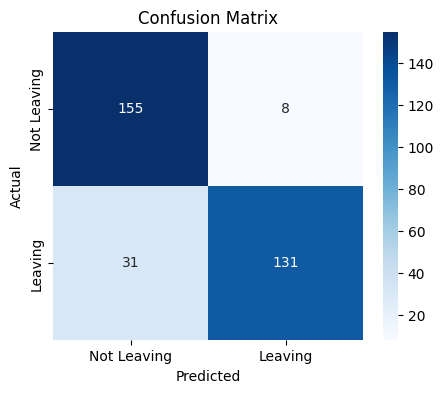

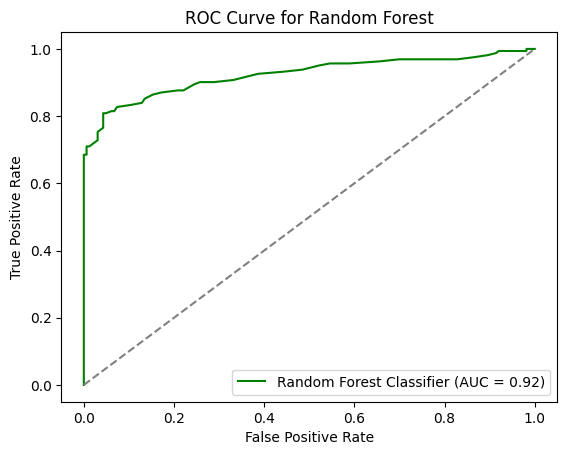

In [22]:
# Build the Random Forest Classifier Model with training data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
# Make predictions on the dataset
y_pred_rf = rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy for Random Forest: {accuracy_rf * 100:.2f} %")# Print Classificiation report for Random Forest Classification
print("\nRandom Forest Classification Report for test:")
print(classification_report(y_test, y_pred_rf))

cmrf=confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix: ")
print(cmrf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cmrf, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Leaving", "Leaving"], yticklabels=["Not Leaving", "Leaving"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Get the predicted probabilities for the positive class (class 1)
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Calculate the AUC (Area Under the Curve)
roc_auc_rf = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='green', label=f'Random Forest Classifier (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

---Gradient Boosting Model---

Accuracy for Gradient Boosting: 81.85 %
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       163
           1       0.82      0.81      0.82       162

    accuracy                           0.82       325
   macro avg       0.82      0.82      0.82       325
weighted avg       0.82      0.82      0.82       325

Confusion Matrix: 
[[135  28]
 [ 31 131]]


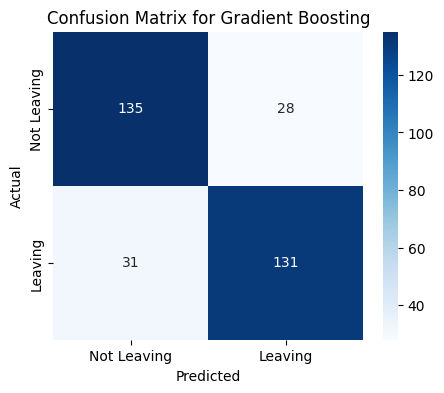

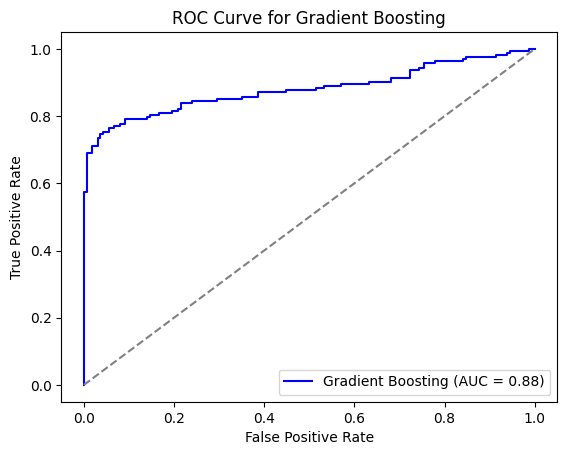

In [23]:
# Build the Gradient Boosting Model with the training data
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the dataset
y_pred_gb = gb_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy for Gradient Boosting: {accuracy_gb * 100:.2f} %")

# Print Classification Report for Gradient Boosting
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Generate Confusion Matrix
cmgb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix: ")
print(cmgb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cmgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Leaving", "Leaving"], yticklabels=["Not Leaving", "Leaving"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

# Get the predicted probabilities for the positive class
y_pred_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gb)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', label=f'Gradient Boosting (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc='lower right')
plt.show()


4. Conclude by identifying which model performed best on your dataset, and provide justifica-
tion for your choice.

In [24]:
# Compare the accuracy of both models
if accuracy_gb > accuracy_rf:
    print("\nConclusion: Gradient Boosting performed better based on accuracy.")
else:
    print("\nConclusion: Random Forest performed better based on accuracy.")


Conclusion: Random Forest performed better based on accuracy.


#4. Hyper-parameter Optimization with Cross-Validation [2.5]:
Hyper-parameter optimization, also known as hyper-parameter tuning, is the process of identifying the best
hyper-parameter values for your selected models. Follow the steps below to perform this task:
1. Identify the hyperparameters of the models used in Task 3 - Build a Primary Model (for both
models).
2. Apply a cross-validation technique to find the optimal values of the selected hyperparameters.
• Hint: You can use techniques like GridSearchCV or RandomizedSearchCV.


---Gradient Boosting Model---

In [25]:
# Define the Gradient Boosting hyperparameter grid
gb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': [None, 'sqrt', 'log2']
}

# Perform RandomizedSearchCV with cross-validation to find the best hyperparameters
random_search_gb = RandomizedSearchCV(gb_model, gb_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the RandomizedSearchCV on the training data to find optimal parameters
random_search_gb.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy')

---Random Forest---

In [26]:
# Define the hyperparameter grid for Random Forest Model
rf_param_grid = {
    'n_estimators': [100, 150, 200],  # Number of trees
    'max_depth': [5, 10, 15, 20],      # Maximum depth of trees
    'min_samples_split': [2, 5, 10],   # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],     # Min samples at a leaf
    'max_features': ['sqrt', 'log2'],  # Features to consider for splits
    'class_weight': ['balanced', None] # Adjust class weight if needed
}
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=rf_param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             verbose=2)


3. Conclude by summarizing the best hyperparameters for both models.

In [27]:
# Retrieve the best hyperparameters for Logistic Regression from GridSearchCV
best_gb_params = random_search_gb.best_params_
# Retrieve the best hyperparameters for Random Forest from RandomizedSearchCV
best_rf_params = grid_search_rf.best_params_

# Print the best hyperparameters for both models
print("Best parameters for Gradient Boost:")
print(best_gb_params)
print("\nBest parameters for Random Forest:")
print(best_rf_params)

Best parameters for Gradient Boost:
{'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'learning_rate': 0.3}

Best parameters for Random Forest:
{'class_weight': None, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


#5. Feature Selection [2.5]:
In this section, apply one of the feature selection techniques discussed in the Week-10 tutorial to identify and
select the most relevant features for your models. Clearly document your process and justify your choice of
features.

In [28]:
# Build the Random Forest Classifier Model with training data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get feature importances from the trained Random Forest model and sort
rf_feature_names = pd.Series(rf_model.feature_importances_,
                             index=X.columns).sort_values(ascending=False).index.tolist()
print("Random Forest Selected Features:")
print(rf_feature_names)

# Build the Gradient Boosting Model with the training data
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Get the feature importance based on the Gradient Boosting model and sort
gb_feature_names = pd.Series(gb_model.feature_importances_,
                             index=X_train.columns).sort_values(ascending=False).index.tolist()
print("\nGradient Boosting Selected Features:")
print(gb_feature_names)

Random Forest Selected Features:
['Monthly_Income', 'Average_Hours_Worked_Per_Week', 'Training_Hours_Last_Year', 'Hourly_Rate', 'Years_Since_Last_Promotion', 'Distance_From_Home', 'Age', 'Job_Level', 'Years_at_Company', 'Absenteeism', 'Performance_Rating', 'Project_Count', 'Relationship_with_Manager', 'Years_in_Current_Role', 'Number_of_Companies_Worked', 'Job_Involvement', 'Job_Satisfaction', 'Job_Role_Manager', 'Work_Life_Balance', 'Work_Environment_Satisfaction', 'Overtime', 'Marital_Status_Married', 'Department_Sales', 'Gender', 'Department_Marketing', 'Job_Role_Executive', 'Marital_Status_Single', 'Department_HR', 'Job_Role_Assistant', 'Department_IT']

Gradient Boosting Selected Features:
['Performance_Rating', 'Monthly_Income', 'Average_Hours_Worked_Per_Week', 'Training_Hours_Last_Year', 'Overtime', 'Years_Since_Last_Promotion', 'Relationship_with_Manager', 'Years_at_Company', 'Age', 'Job_Level', 'Job_Involvement', 'Department_Sales', 'Marital_Status_Married', 'Job_Role_Manager'

#6. Final Model [2.5]:
Using the optimal hyperparameters identified in Task - 4 and the selected features from Task - 5, rebuild
both models from Task - 3. Evaluate the performance of the final models and provide a summary of your
findings.


Accuracy for Gradient Boosting:  88.31 %
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       163
           1       0.92      0.84      0.88       162

    accuracy                           0.88       325
   macro avg       0.89      0.88      0.88       325
weighted avg       0.89      0.88      0.88       325

Confusion Matrix: 
[[151  12]
 [ 26 136]]


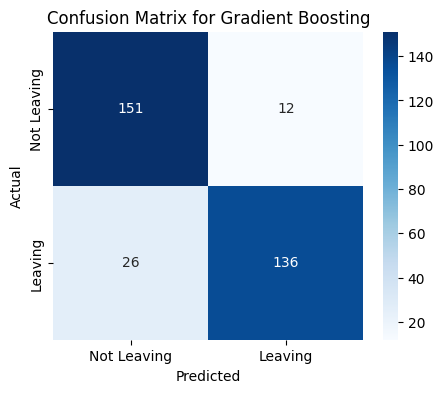

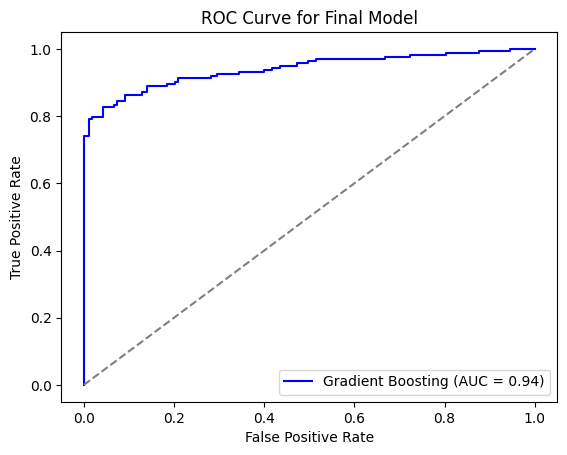

In [30]:
# Rebuild Gradient Boosting model with the best hyperparameters
gb_model_optimal = GradientBoostingClassifier(**best_gb_params, random_state=42)

# Train the optimal Gradient Boosting model using selected features
gb_model_optimal.fit(X_train[gb_feature_names], y_train)

# Predict and evaluate Gradient Boosting model
y_pred_gb = gb_model_optimal.predict(X_test[gb_feature_names])
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"\nAccuracy for Gradient Boosting: {gb_accuracy*100: .2f} %")
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
cmgb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix: ")
print(cmgb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cmgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Leaving", "Leaving"], yticklabels=["Not Leaving", "Leaving"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

# Get the predicted probabilities for the positive class (class 1)
y_pred_prob_gb = gb_model_optimal.predict_proba(X_test[gb_feature_names])[:, 1]

# Calculate the ROC curve for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot the ROC curves
plt.plot(fpr_gb, tpr_gb, color='blue', label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Final Model')
plt.legend(loc='lower right')
plt.show()

# 7. Conclusion [2.5]:
Provide a brief summary of the outcomes of your experiment by addressing the following points:
1. **Model Performance:** How did your models perform in? Discuss the key results and metrics.
  *   Model from scratch: Accuracy is 74.15%
  *   Gradient Boosting Model: 81.35%
  *   Random Forest Model: 88.00%
  *   Final Gradient Model: Accuracy is 88.31%

  Gradient Boosting Model performed well with an accuracy of 88.31%.

2. **Impact of Methods:** Analyze the effect of the techniques you applied, such as Cross-Validation
and Feature Selection. Did these methods improve or reduce model performance? Provide a brief explanation.

  Ans: Cross-validation techniques like RandomizedSearch and GridSearch helped improve model generalization, leading to better handling of imbalanced classes, though it slightly reduced accuracy.

3. **Insights and Future Directions:** Reflect on what you learned from the experiment. What insights
can be drawn from your analysis, and what potential improvements or extensions could be explored in
future work?
  - Insights: Although Random Forest generally outperformed, cross-validation highlighted the model’s handling of class imbalance.
  - Future Directions: Exploring more sophisticated resampling techniques, feature engineering, or other classification models may further improve performance.